In [99]:
#import required libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data.shape

(7043, 21)

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


* Most customers are not senior citizens.
* 25% of customers have a tenure of 9 months or less, 50% have a tenure of 29 months or less, and 75% have a tenure of 55 months or less.Tenure varies widely, indicating a diverse customer base in terms of how long they have been with the company.
* The "MonthlyCharges" variable indicates the monthly charge a customer pays.25% of customers pay $35.50 or less per month, 50% pay $70.35 or less, and 75% pay $89.85 or less.

In [8]:
#checking summary for non numerical col
data.astype('object').describe().T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
tenure,7043,73,1,613
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498


**Understanding categorical data**<br>
checking for unique values

In [9]:
#cheking unique values of categorical columns
for i, cat_col in enumerate(data.select_dtypes(include="O").columns):
    print(f"{i+1}. {cat_col}: {data[cat_col].nunique()} \n values: {data[cat_col].unique()} \n")

1. customerID: 7043 
 values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

2. gender: 2 
 values: ['Female' 'Male'] 

3. Partner: 2 
 values: ['Yes' 'No'] 

4. Dependents: 2 
 values: ['No' 'Yes'] 

5. PhoneService: 2 
 values: ['No' 'Yes'] 

6. MultipleLines: 3 
 values: ['No phone service' 'No' 'Yes'] 

7. InternetService: 3 
 values: ['DSL' 'Fiber optic' 'No'] 

8. OnlineSecurity: 3 
 values: ['No' 'Yes' 'No internet service'] 

9. OnlineBackup: 3 
 values: ['Yes' 'No' 'No internet service'] 

10. DeviceProtection: 3 
 values: ['No' 'Yes' 'No internet service'] 

11. TechSupport: 3 
 values: ['No' 'Yes' 'No internet service'] 

12. StreamingTV: 3 
 values: ['No' 'Yes' 'No internet service'] 

13. StreamingMovies: 3 
 values: ['No' 'Yes' 'No internet service'] 

14. Contract: 3 
 values: ['Month-to-month' 'One year' 'Two year'] 

15. PaperlessBilling: 2 
 values: ['Yes' 'No'] 

16. PaymentMethod: 4 
 values: ['Electronic check' 'Mailed check'


* Total Charges is object type it should be converted to numerical

In [10]:
data[data['TotalCharges'] == " "]['TotalCharges'].count()

11

* There are 11 columns with empty values

In [11]:
data[data['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


* we can see tenure is 0 for every row, so we can take the total charges as 0

In [12]:
#changing data type
#column Total charges should be
data['TotalCharges']= data['TotalCharges'].replace(" ", '0')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
data['TotalCharges'].dtype

dtype('float64')

In [14]:
#checking null values
for col in data.columns:
    print(col.ljust(20), data[col].isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0


In [15]:
#checking duplicates
data.duplicated().sum()

0

In [16]:
data.drop(columns=['customerID'], inplace=True)

* Unique Value: Each Customer ID is unique and does not provide any meaningful information about the customer's behavior or characteristics.
* No Correlation: Customer ID does not have any inherent correlation with churn or other relevant features.
* Potential Overfitting: Including unique identifiers can lead to overfitting, where the model learns patterns specific to the training data but fails to generalize to new data.

# EDA

## Univariate Analysis

**1. Overall churn**

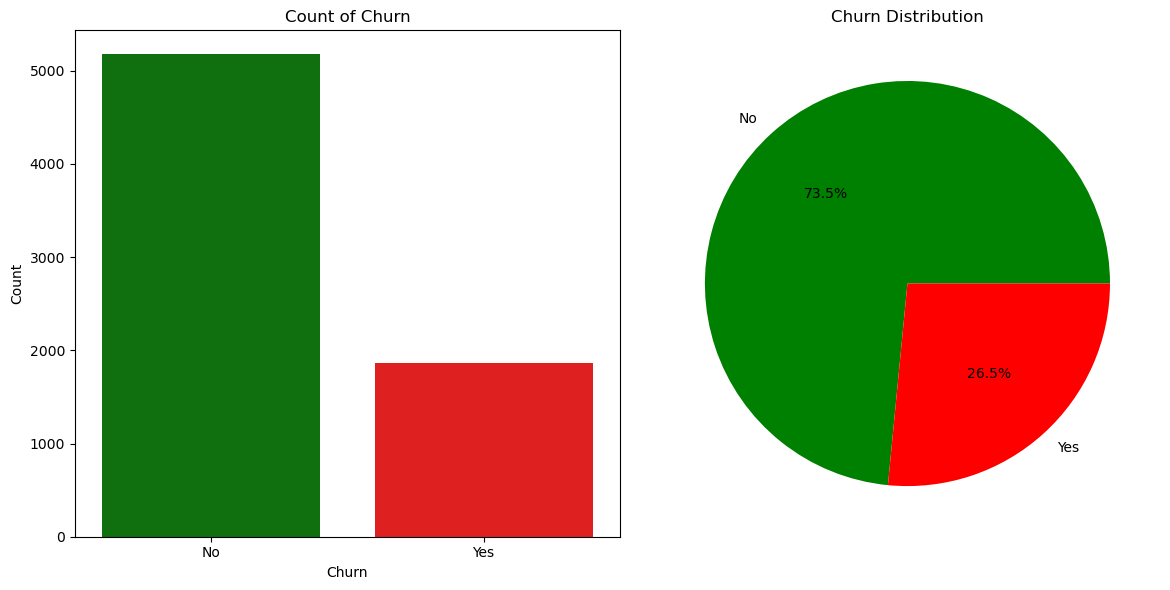

In [18]:
# Countplot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  
sns.countplot(x='Churn', data=data, palette=['green', 'red'])
plt.title('Count of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

# Pie chart
plt.subplot(1, 2, 2)
churn_counts = data['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Churn Distribution')

plt.tight_layout()  
plt.show()

In [19]:
#churn count
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [20]:
#churn customers percent
data['Churn'].value_counts()/len(data['Churn'])*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

* Data is highly imbalanced, ratio = 73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

**2. All categories**

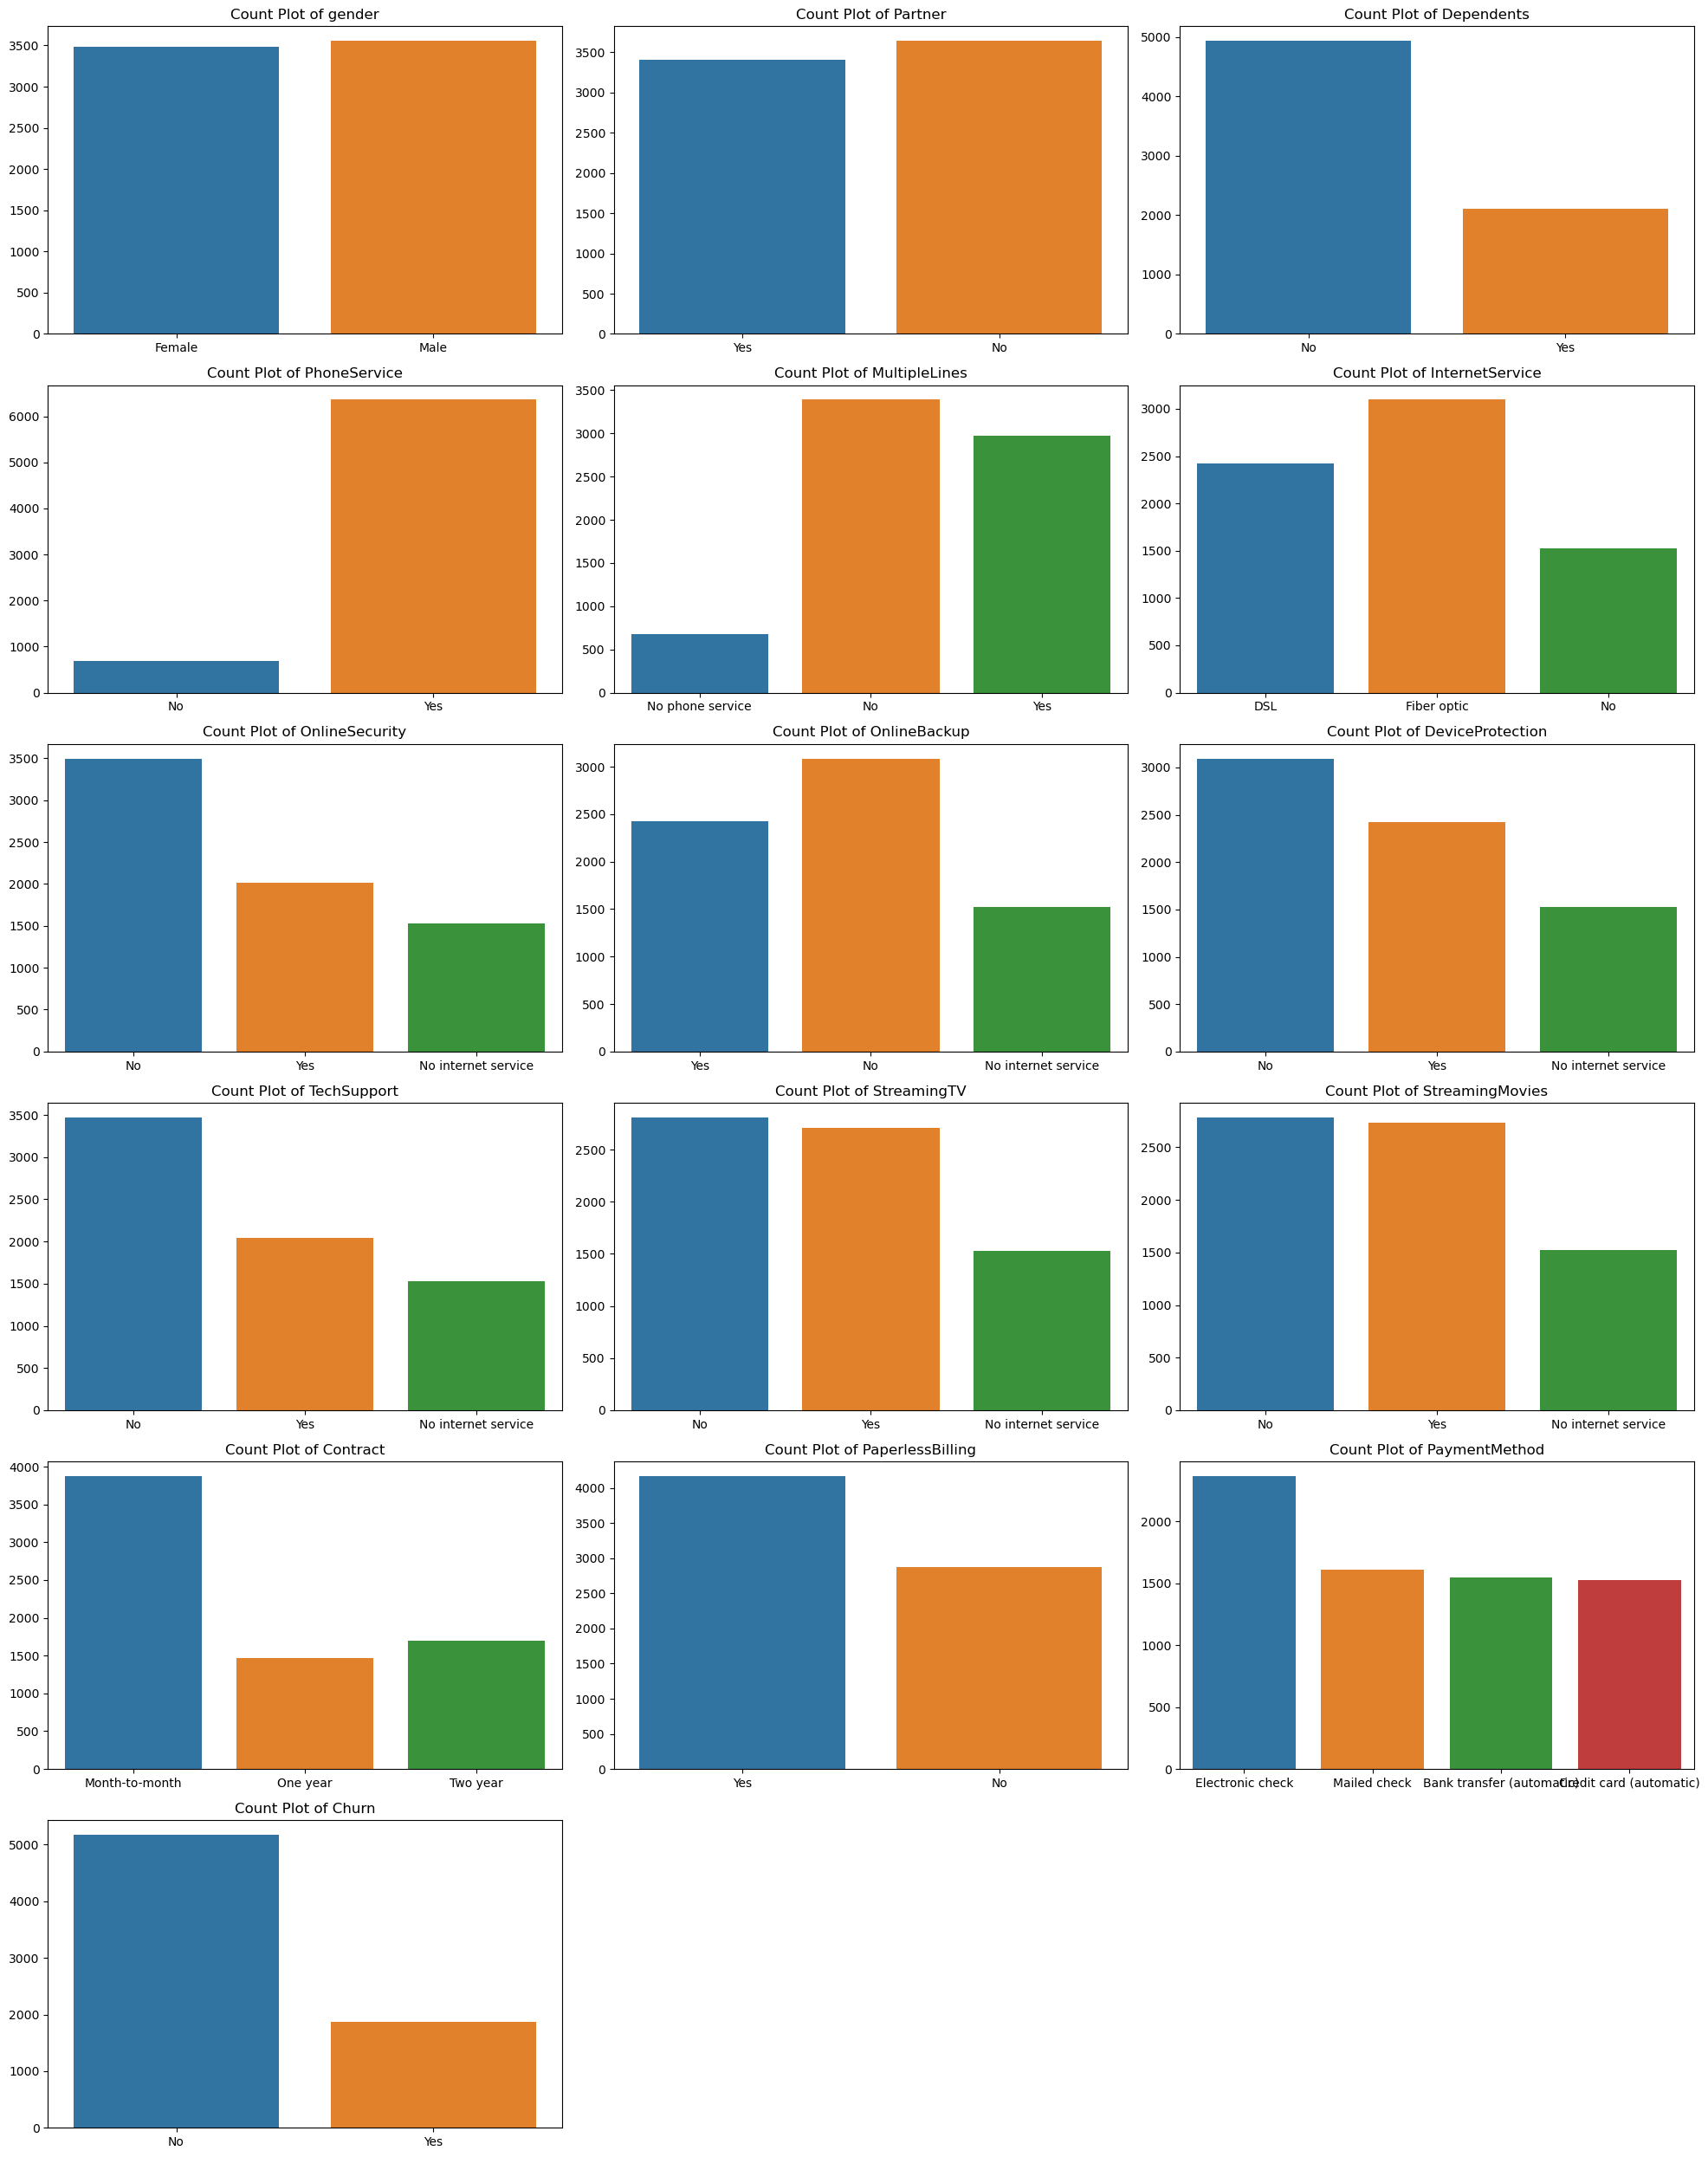

In [21]:
# Get categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Create a figure and subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 25))
axes = axes.flatten()

# Plot count plots for each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=data, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* Checking Outliers for numerical col with boxplots

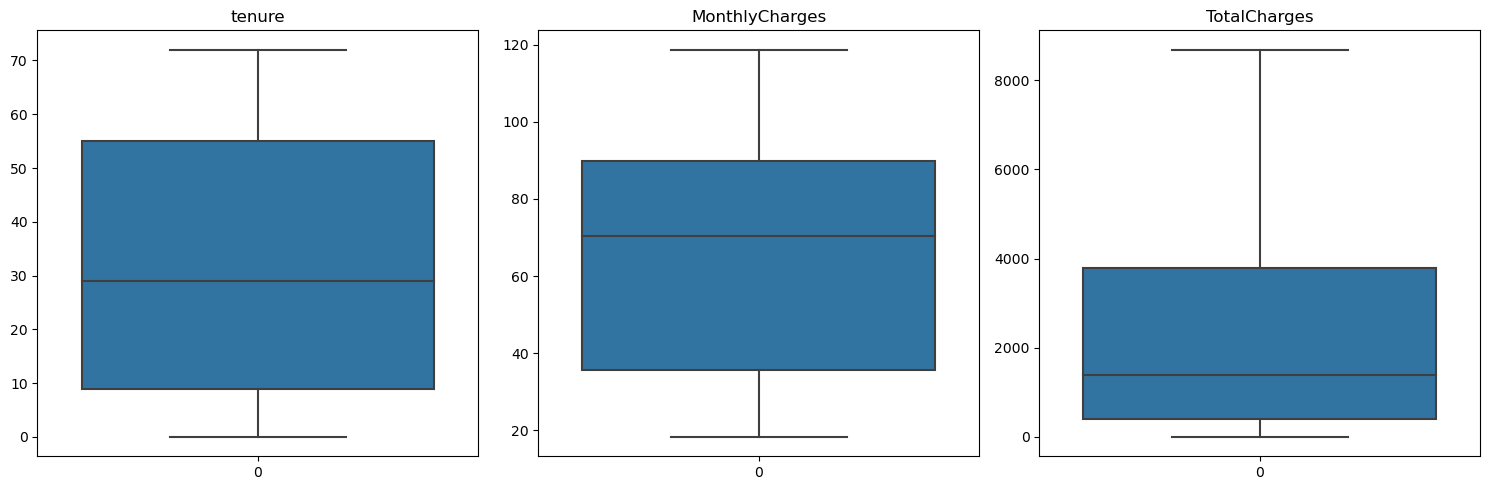

In [22]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax,col in enumerate(num_cols):
    sns.boxplot(data=data[col], ax=axes[ax])
    axes[ax].set_title(f"{col}")

plt.tight_layout()
plt.show()


* No Outliers

In [24]:
# Calculate box plot statistics for MonthlyCharges
def box_plot_stats(data, column_name):
    Q1 = data.quantile(0.25)
    Q2 = data.median()
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = data[data >= Q1 - 1.5 * IQR].min()
    upper_whisker = data[data <= Q3 + 1.5 * IQR].max()
    
    return {
        'Column': column_name,
        'Lower Whisker': lower_whisker,
        'Q1 (25th percentile)': Q1,
        'Median (Q2/50th percentile)': Q2,
        'Q3 (75th percentile)': Q3,
        'Upper Whisker': upper_whisker,
        'IQR': IQR
    }

# Calculate box plot statistics for MonthlyCharges
monthly_charges_stats = box_plot_stats(data['MonthlyCharges'], 'MonthlyCharges')

# Print the statistics for MonthlyCharges
for key, value in monthly_charges_stats.items():
    print(f"{key}: {value}")

print()

# Calculate box plot statistics for TotalCharges
total_charges_stats = box_plot_stats(data['TotalCharges'], 'TotalCharges')

# Print the statistics for TotalCharges
for key, value in total_charges_stats.items():
    print(f"{key}: {value}")


Column: MonthlyCharges
Lower Whisker: 18.25
Q1 (25th percentile): 35.5
Median (Q2/50th percentile): 70.35
Q3 (75th percentile): 89.85
Upper Whisker: 118.75
IQR: 54.349999999999994

Column: TotalCharges
Lower Whisker: 0.0
Q1 (25th percentile): 398.55
Median (Q2/50th percentile): 1394.55
Q3 (75th percentile): 3786.6
Upper Whisker: 8684.8
IQR: 3388.0499999999997


* MonthlyCharges Distribution:
* 1.The majority of customers have monthly charges ranging from approximately 35 to 90, as indicated by the interquartile range (IQR).
* 2.There are some customers with significantly higher monthly charges, represented by the upper whisker extending to 118.75 dollars.
* The median monthly charge of 70.35 suggests that half of the customers have a monthly charge below this valueindicating a relatively balanced distribution.
* TotalCharges Variation:

* 1.The total charges exhibit a wider spread compared to monthly charges, as evidenced by the larger interquartile range (IQR) of 3393.29.
* 2.The upper whisker extends up to 8684.80 , indicating the presence of customers with substantially higher total charges.
* 3.Despite the wide variability, the median total charge of 1397.48 suggests that half of the customers have a total charge below this value, highlighting the significant variation in customer spending.

## Bivariate Analysis

**1. categorical vs churn**

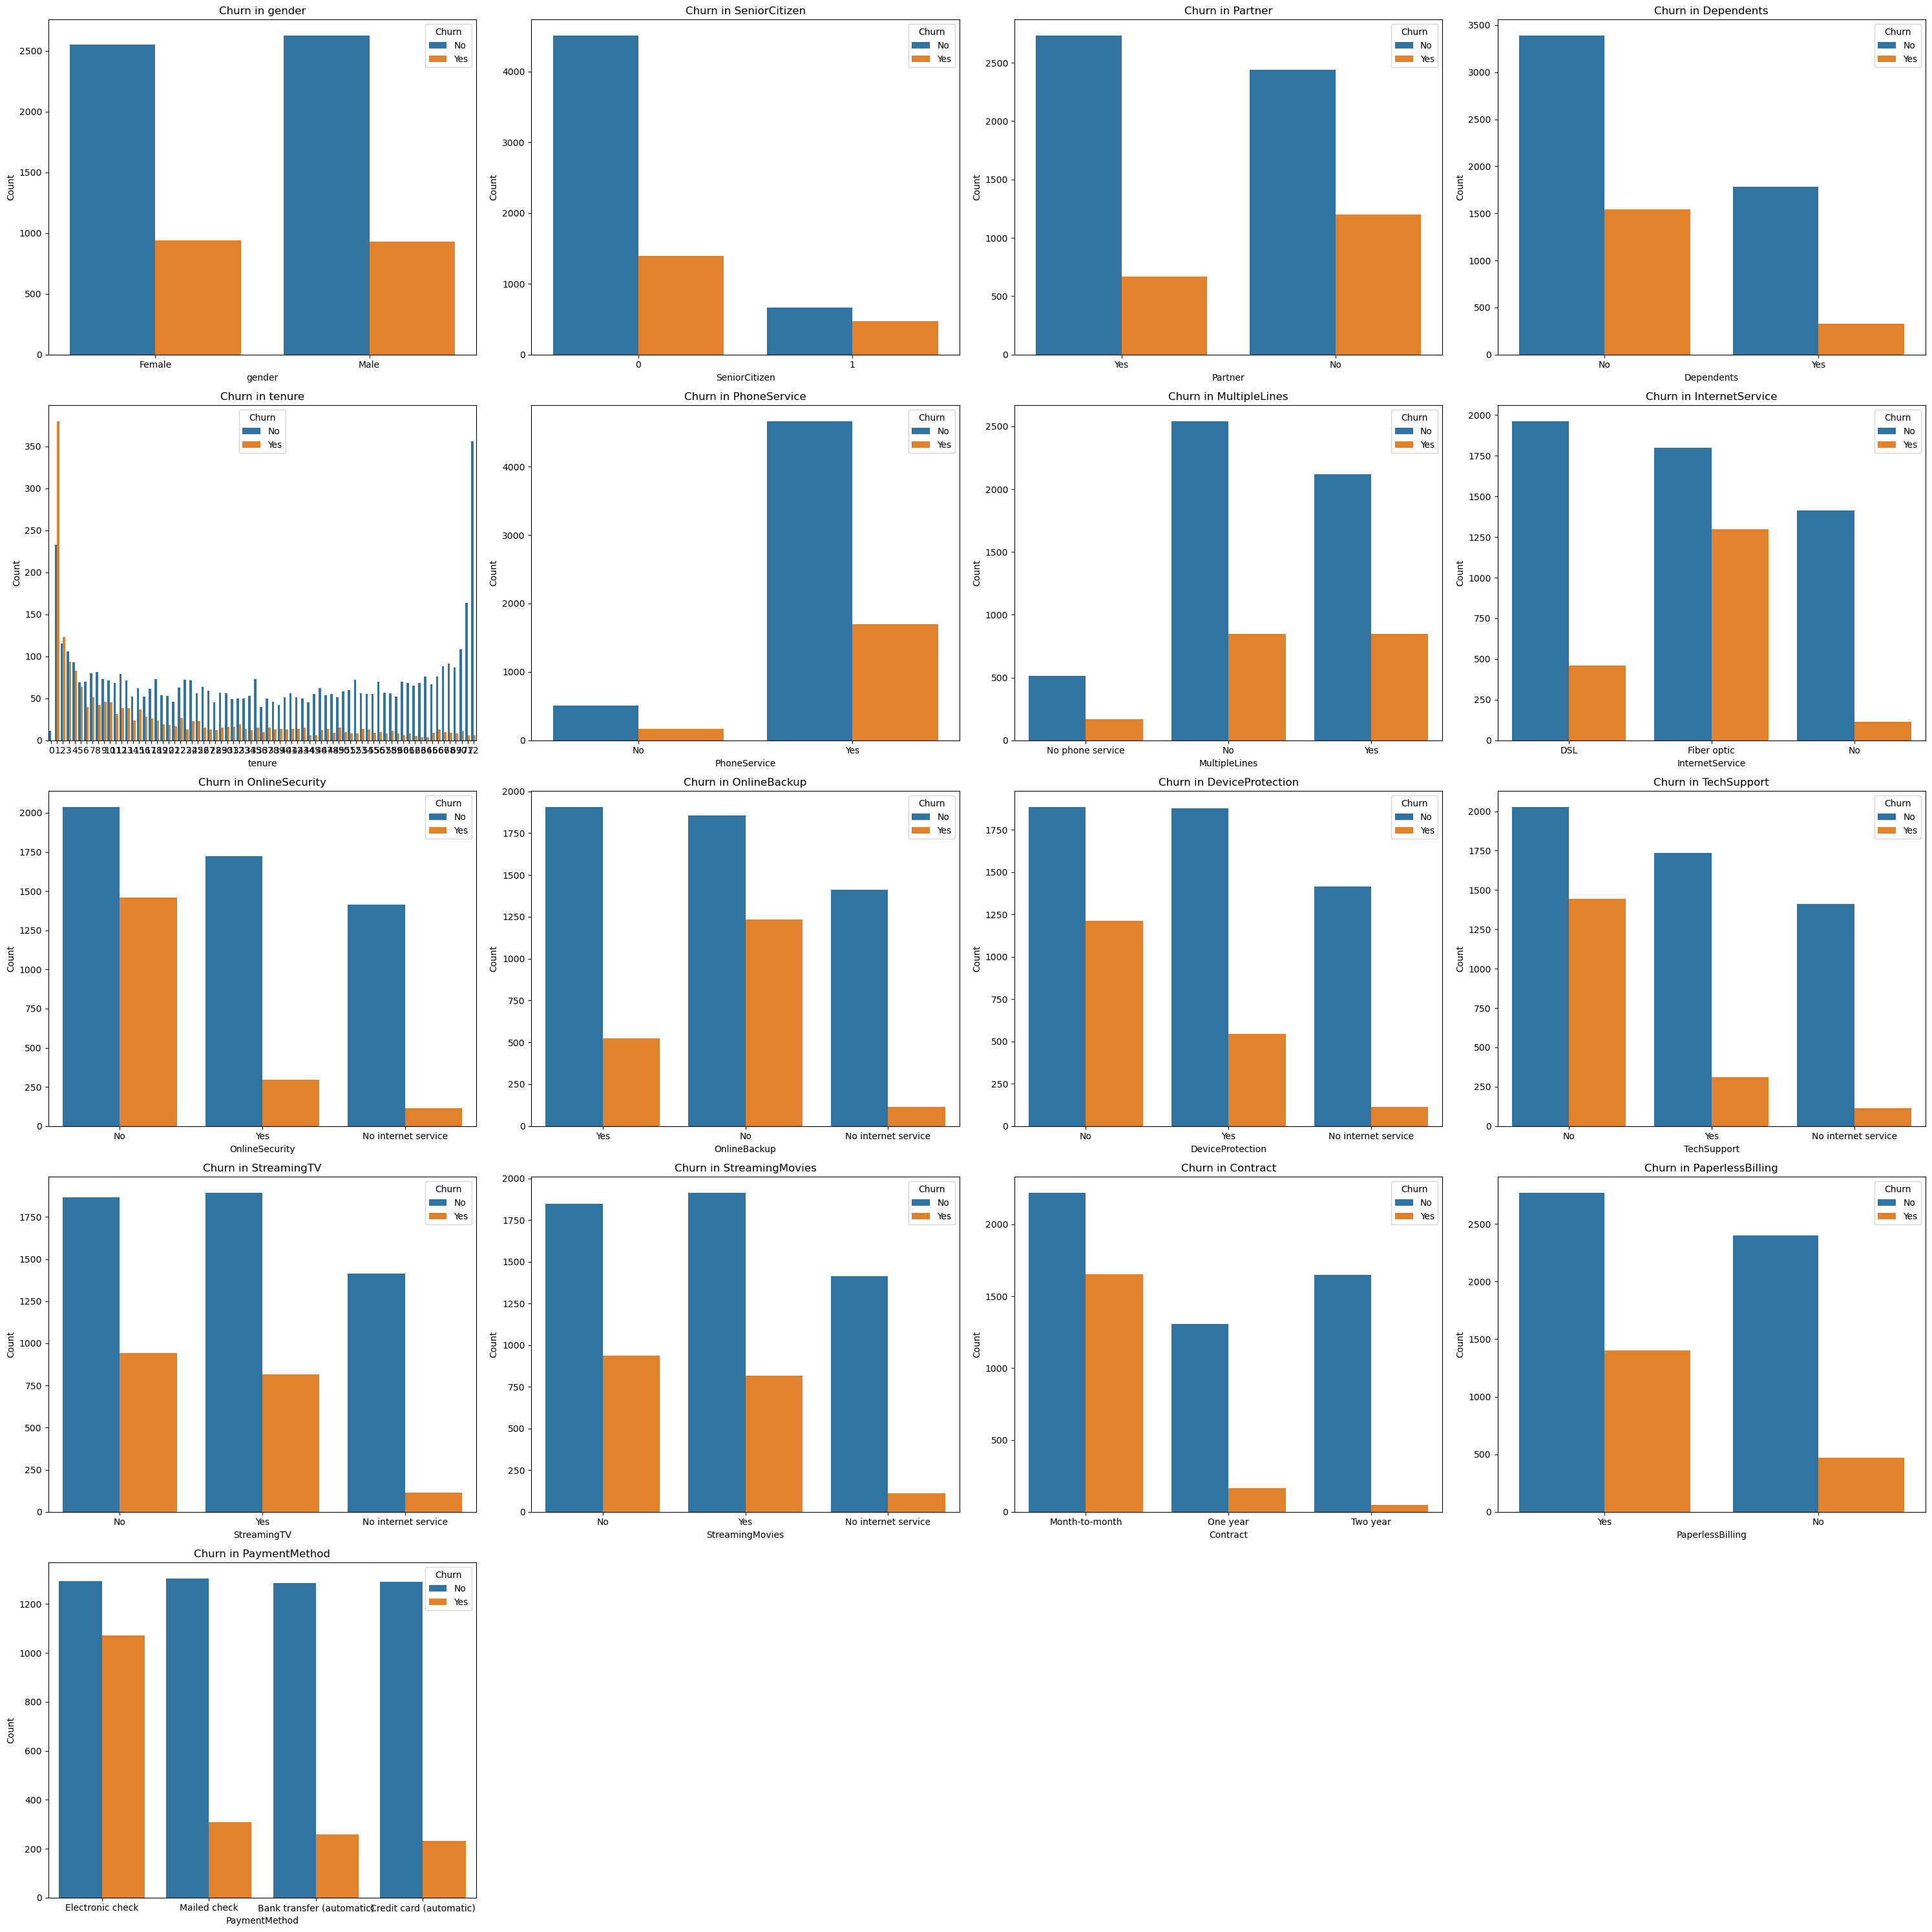

In [30]:
# Defining the columns to plot (excluding 'Churn' column and specified columns)
columns_to_plot = data.columns.drop(['Churn', 'TotalCharges', 'MonthlyCharges'])

# Calculate the number of rows and columns for the subplots grid
num_cols = 4
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

# Set up the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterating through each column and creating a countplot
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=data, x=column, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Churn in {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* These are some of the quick insights:

* 1. Electronic check medium are the highest churners
* 2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
* 3. No Online security, No Tech Support category are high churners
* 4. Non senior Citizens are high churners


**2. Numerical vs churn**

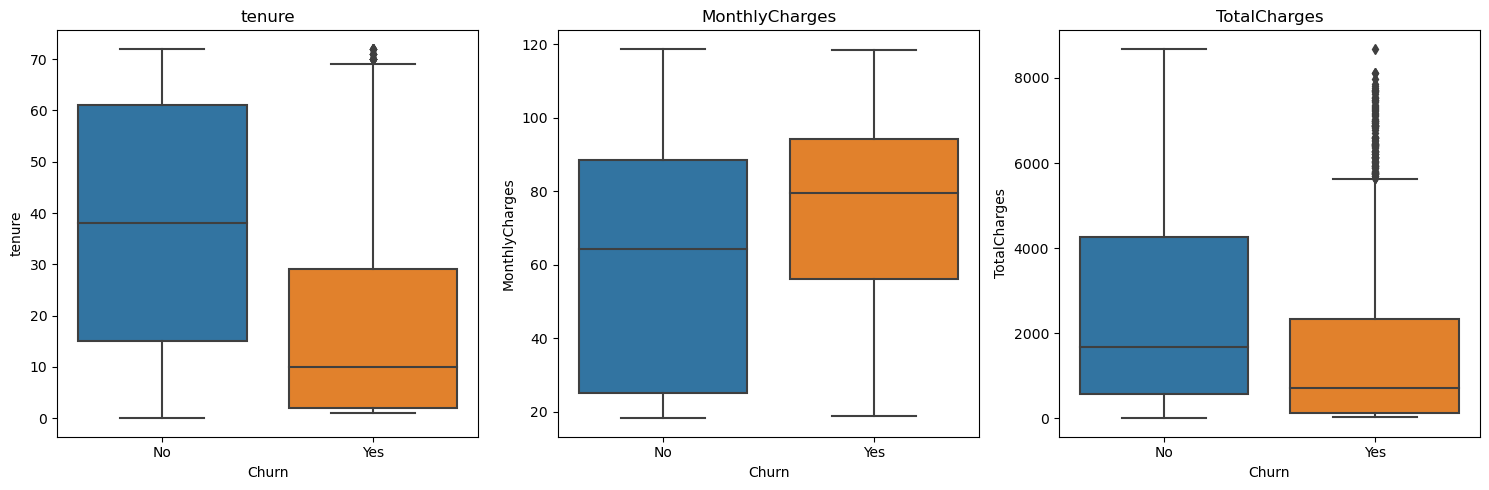

In [24]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax,col in enumerate(num_cols):
    sns.boxplot(data=data, x='Churn',y=col ,ax=axes[ax])
    axes[ax].set_title(f"{col}")

plt.tight_layout()
plt.show()

**3. Categorical and Churn = yes**

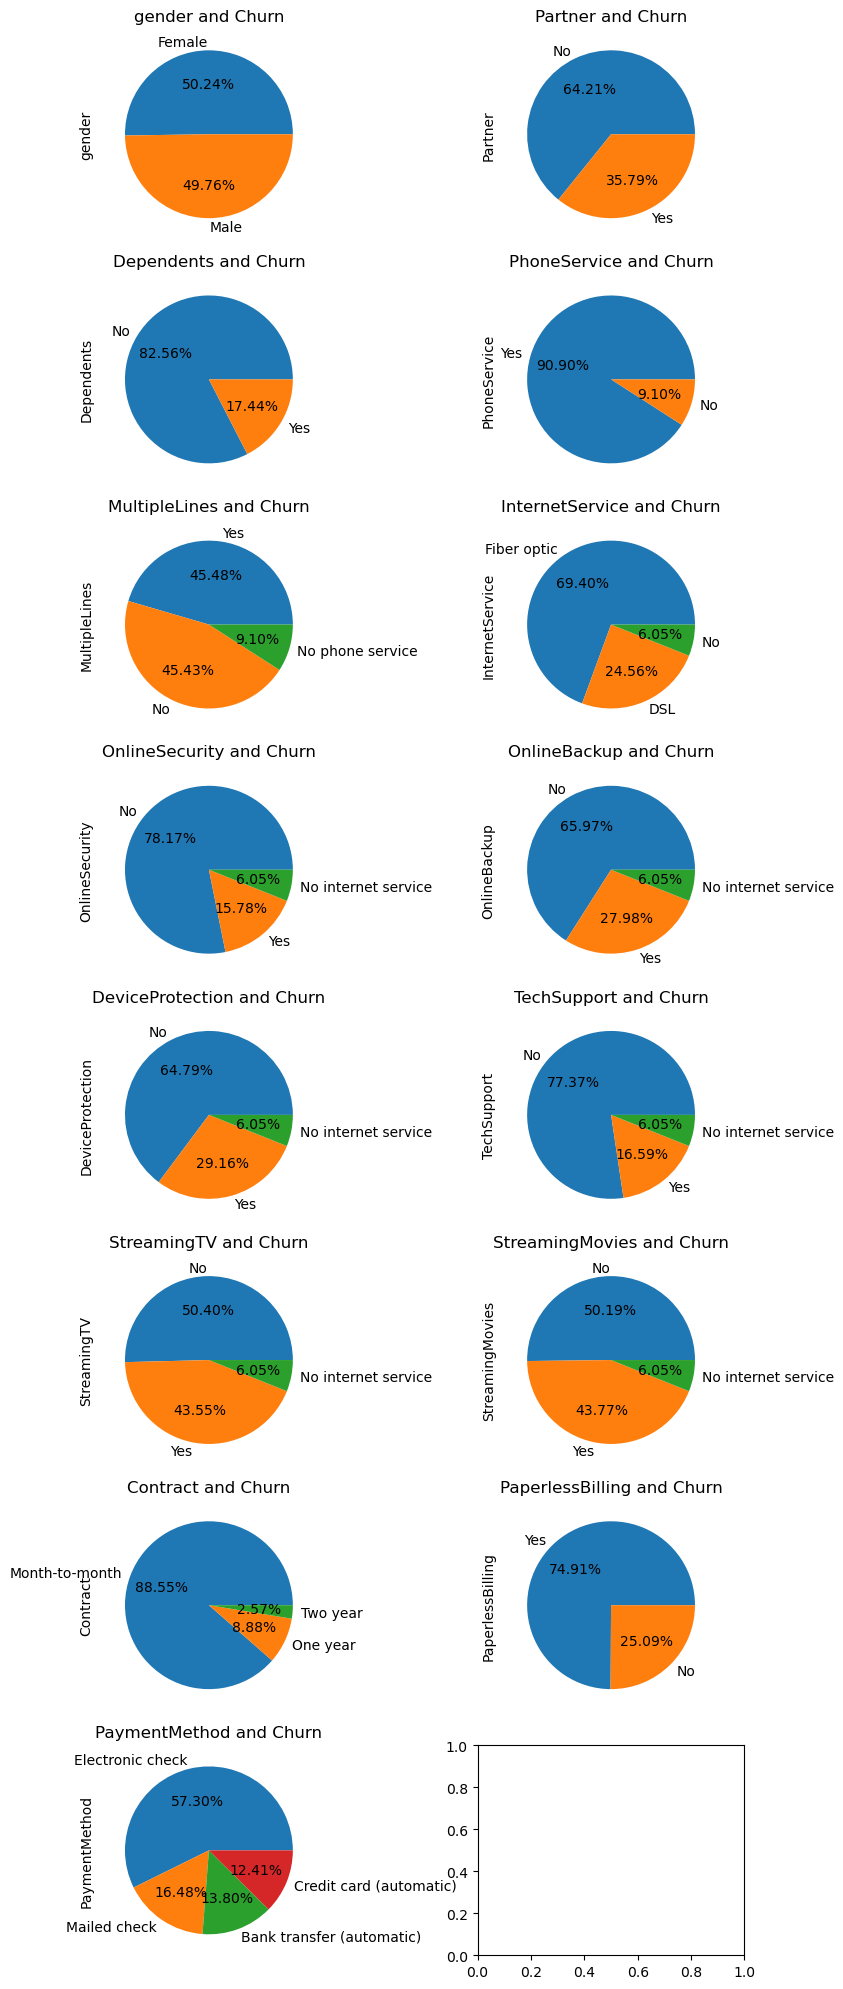

In [25]:
fig, axes = plt.subplots(8, 2, figsize=(8, 20))
axes = axes.flatten()
cols=data.select_dtypes(include="O").columns
cols=cols.delete(cols.get_loc("Churn"))

for i, cat_col in enumerate(cols):
    data[data['Churn']=='Yes'][cat_col].value_counts().plot(kind='pie', autopct= "%.2f%%",ax=axes[i])
    axes[i].set_title(f"{cat_col} and Churn")

plt.tight_layout()
plt.show()

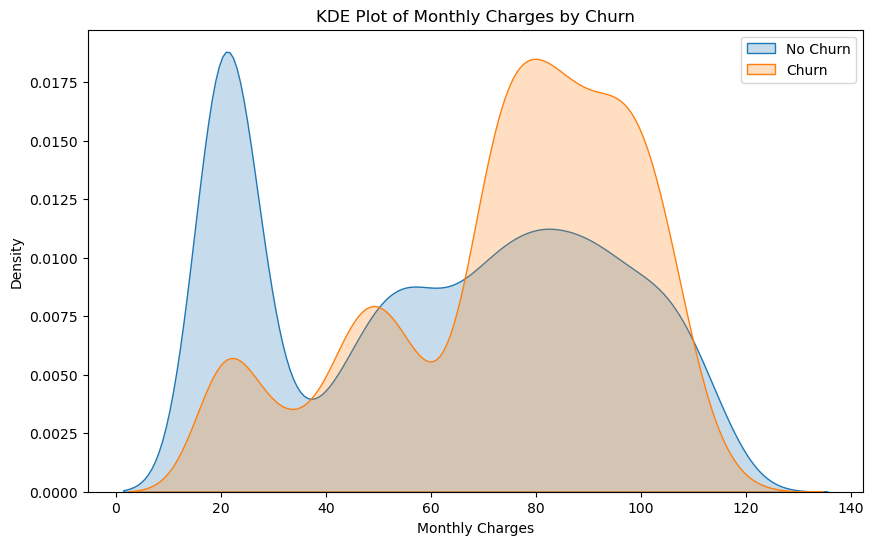

In [33]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data[data['Churn'] == 'No'], x='MonthlyCharges', label='No Churn', shade=True)
sns.kdeplot(data=data[data['Churn'] == 'Yes'], x='MonthlyCharges', label='Churn', shade=True)
plt.title('KDE Plot of Monthly Charges by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.legend()
plt.show()


## Multivariate Analysis

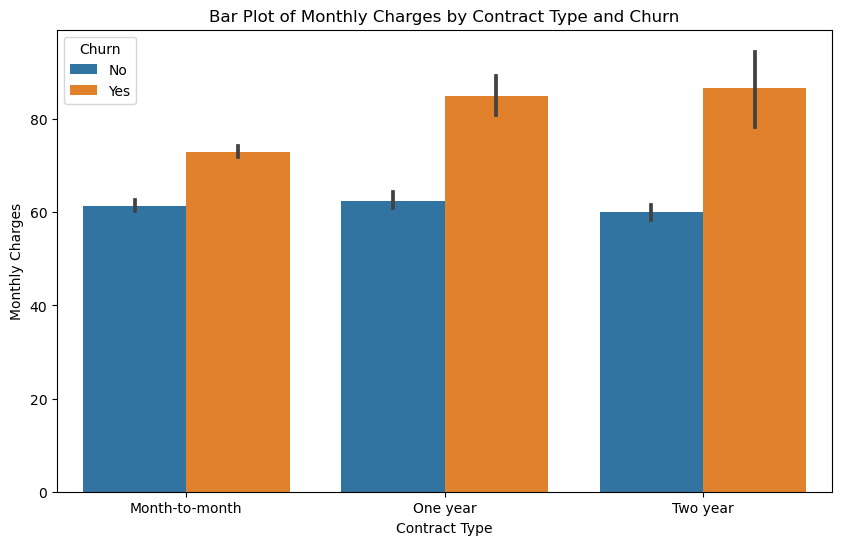

In [41]:
#Bar Plot of Monthly Charges by Contract Type and Churn
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Contract', y='MonthlyCharges', hue='Churn')
plt.title('Bar Plot of Monthly Charges by Contract Type and Churn')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.show()


**2. Numerical columns vs actual churn**

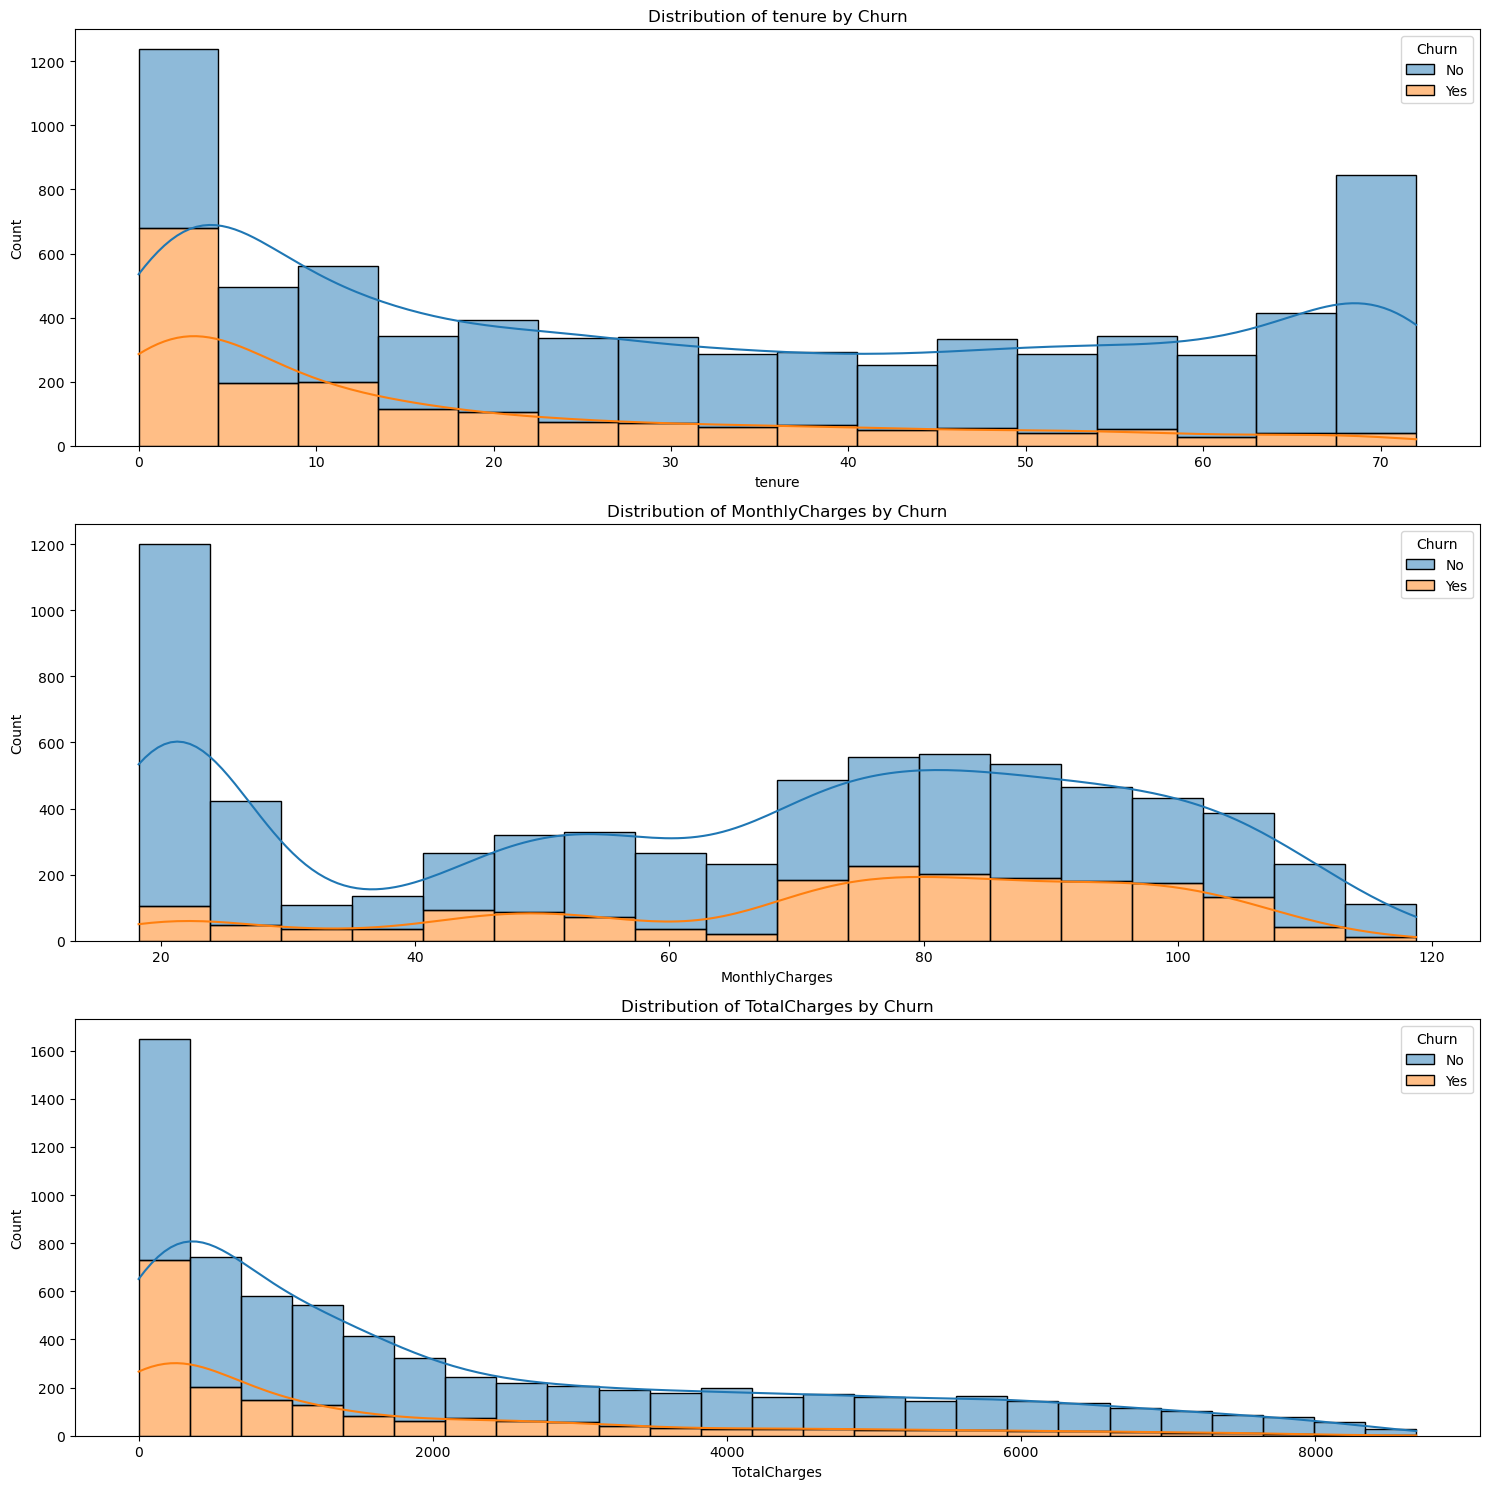

In [42]:
# Defining the numerical columns to plot
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set up the subplot grid
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(15, 5 * len(numerical_columns)))

# Iterating through each numerical column and creating histplot
for i, column in enumerate(numerical_columns):
    sns.histplot(data=data, x=column, hue='Churn', multiple='stack', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column} by Churn')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

Findings:
* Chances of leaving decreases with increase in tenure
* Total charges is inversly proprotional to churn

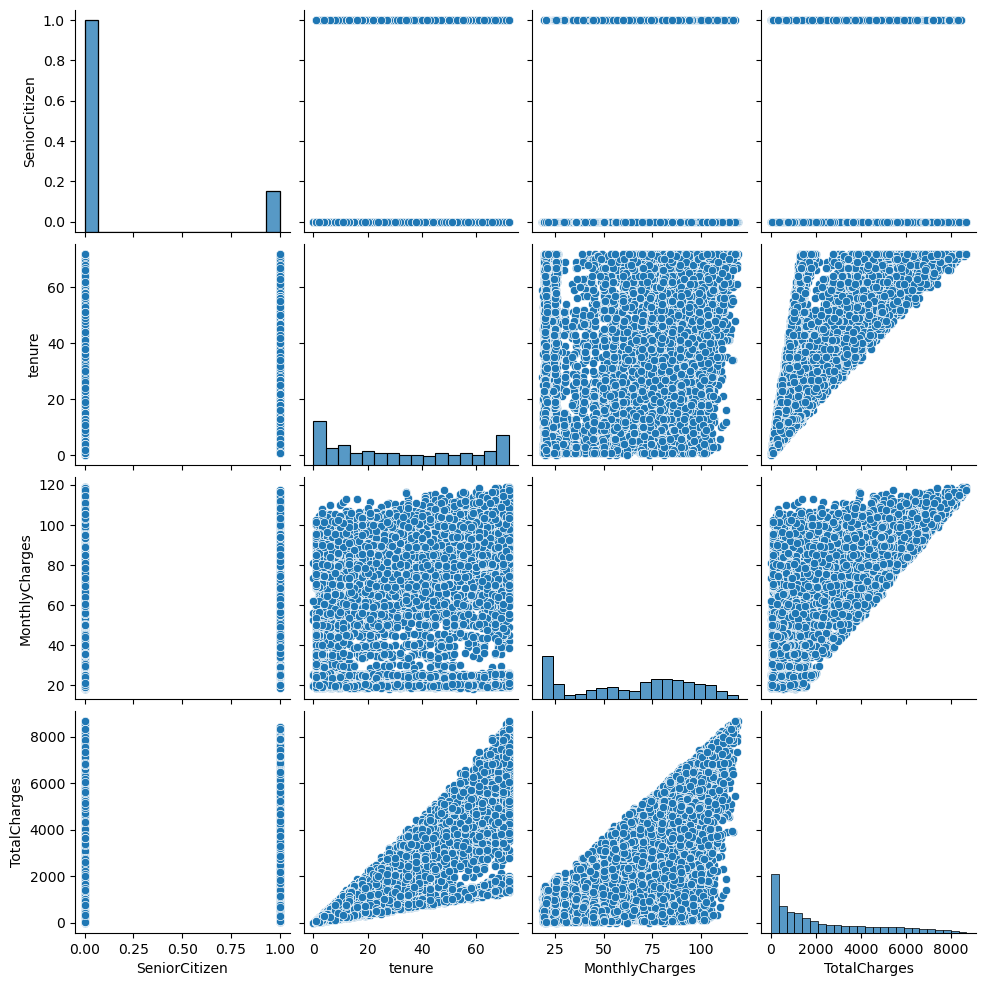

In [39]:
sns.pairplot(data)

**Findings**<br>
Correlation between tenure-TotalCharges, MonthlyCharges-TotalCharges

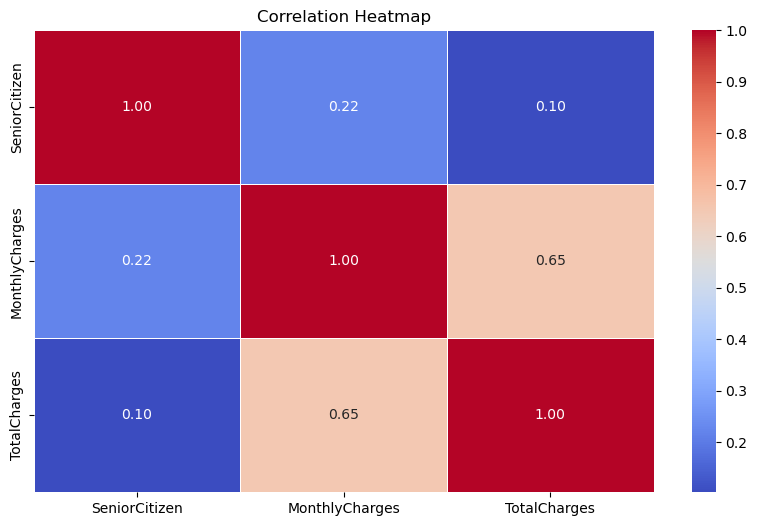

In [49]:
# Calculate the correlation matrix
correlation_matrix = data[['SeniorCitizen', 'MonthlyCharges', 'TotalCharges']].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Feature engineering

**Encoding the data**

**One hot encoding**

In [75]:
category=["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
encode_df = pd.get_dummies(data=label_df, columns= category)
encode_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


**Correlation matrix**

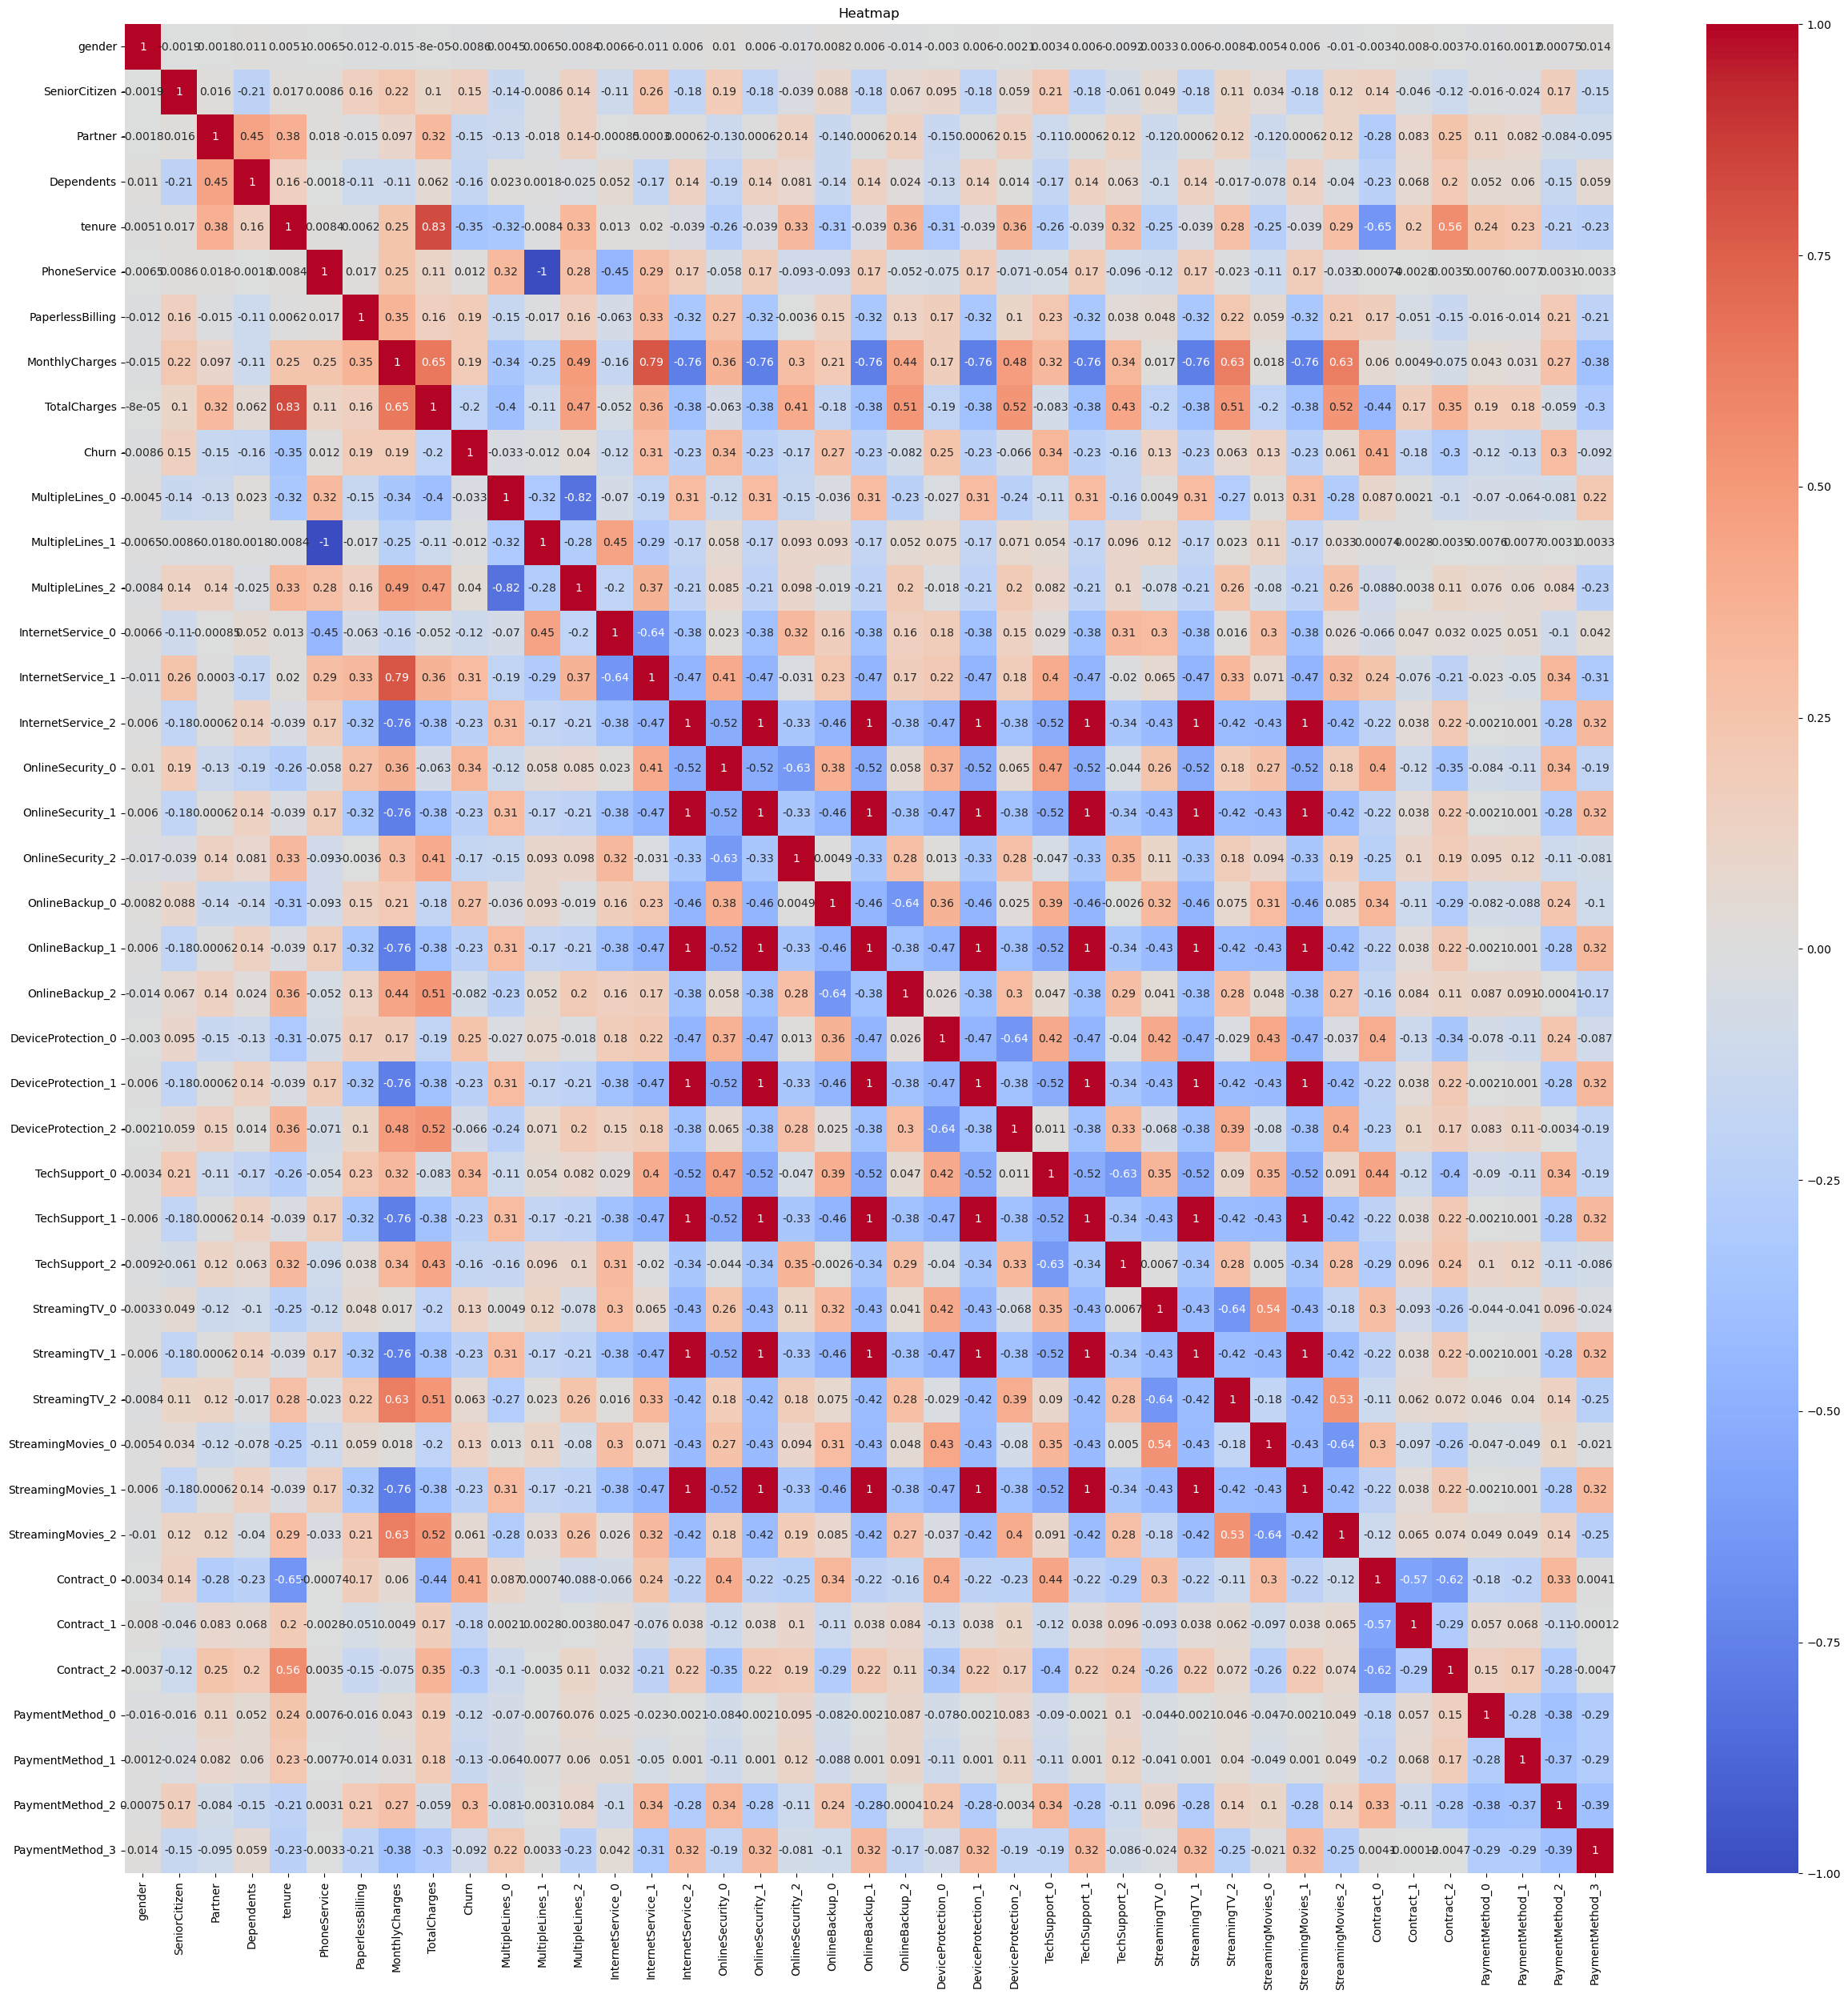

In [76]:
corr_m2=encode_df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr_m2, annot=True,cmap='coolwarm')
plt.title('Heatmap')
plt.show()

**Correlated columns**
* tenure-totalcharges
* tenure-contract
* Monthlycharges-totalcharges
* internetservice_2, onlinesecurity_1, onlineBackup_1, DeviceProtection_1, techsupport_1, streamingTV_1, streamingMovies_1 are highly correlated with each other.


# Prediction Model

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
df=encode_df.drop(columns=['tenure', 'MonthlyCharges', 'InternetService_2','OnlineSecurity_1','DeviceProtection_1', 'TechSupport_1','StreamingTV_1', 'StreamingMovies_1' ], axis=1)

In [79]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [80]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46, stratify=y)

## Logistic regression

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [100]:
model= LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [83]:
y_pred = model.predict(X_test)

In [84]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.8021769995267393
Confusion Matrix:
[[1409  143]
 [ 275  286]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.67      0.51      0.58       561

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



## Gradient Boosting

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [86]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [87]:
y_pred_gb = gbc.predict(X_test)

In [88]:
accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred_gb)
print("Classification Report:")
print(class_report)

Accuracy: 0.8121154756270705
Confusion Matrix:
[[1415  137]
 [ 260  301]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1552
           1       0.69      0.54      0.60       561

    accuracy                           0.81      2113
   macro avg       0.77      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113



## Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [90]:
y_pred_rf = rf.predict(X_test)

In [91]:
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(class_report)

Accuracy: 0.7775674396592522
Confusion Matrix:
[[1380  172]
 [ 298  263]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1552
           1       0.60      0.47      0.53       561

    accuracy                           0.78      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.76      0.78      0.77      2113



## Comparing models

Accuracy, Precision, recall, F1 score comparison

In [92]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
model_name=['Logistic Regression', 'Gradient Boosting', 'Random Forest']


In [93]:
accu_list= [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_gb),accuracy_score(y_test, y_pred_rf)]
prec_list= [precision_score(y_test, y_pred), precision_score(y_test, y_pred_gb),precision_score(y_test, y_pred_rf)]
rec_list = [recall_score(y_test, y_pred), recall_score(y_test, y_pred_gb),recall_score(y_test, y_pred_rf)]
f1_list = [f1_score(y_test, y_pred), f1_score(y_test, y_pred_gb),f1_score(y_test, y_pred_rf)]

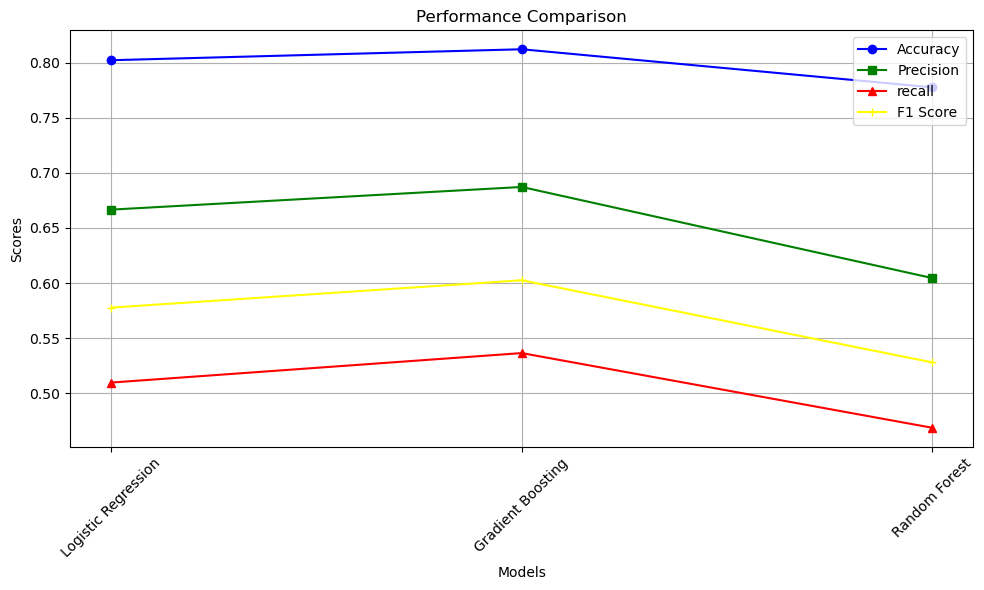

In [94]:
plt.figure(figsize=(10, 6))

plt.plot(model_name, accu_list, marker='o', label='Accuracy', color='blue')

plt.plot(model_name, prec_list, marker='s', label='Precision', color='green')

plt.plot(model_name, rec_list, marker='^', label='recall', color='red')

plt.plot(model_name, f1_list, marker='+', label='F1 Score', color='yellow')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Comparison')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()